Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 3.1) 국내 프로야구 연봉 예측

### 바로가기

- [<Step1. 탐색> 프로야구 연봉 데이터 살펴보기](#<Step1.-탐색>-프로야구-연봉-데이터-살펴보기)
    - [프로야구 연봉 데이터셋의 기본 정보]
    - [회귀 분석에 사용할 피처 살펴보기]
- [<Step2. 예측> : 투수의 연봉 예측하기](#<Step2.-예측>-:-투수의-연봉-예측하기)
    - [피처들의 단위 맞춰주기 : 피처 스케일링]
    - [피처들의 단위 맞춰주기 : one-hot-encoding]
    - [피처들의 상관관계 분석]
    - [회귀 분석 적용하기]
- [<Step3. 평가> : 예측 모델 평가하기](#<Step3.-평가>-:-예측-모델-평가하기)
    - [어떤 피처가 가장 영향력이 강한 피처일까]
    - [예측 모델의 평가]
    - [회귀 분석 예측 성능을 높이기 위한 방법 : 다중 공선성 확인]
    - [믿을만한 피처로 다시 학습하기]
- [<Step4. 시각화> : 분석 결과의 시각화](#<Step4.-시각화>-:-분석-결과의-시각화)
    - [예상 연봉과 실제 연봉 비교]

-----

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 탐색> 프로야구 연봉 데이터 살펴보기

### [프로야구 연봉 데이터셋의 기본 정보]

In [3]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [4]:
batter.columns

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [5]:
batter.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [6]:
batter.head()

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,...,도루,BABIP,타율,출루율,장타율,OPS,wOBA,WAR,연봉(2018),연봉(2017)
0,최정,SK,130,527,430,136,46,89,113,70,...,1,0.316,0.316,0.427,0.684,1.111,0.442,7.30,120000,120000
1,최형우,KIA,142,629,514,176,26,98,120,96,...,0,0.362,0.342,0.450,0.576,1.026,0.430,7.20,150000,150000
2,박건우,두산,131,543,483,177,20,91,78,41,...,20,0.39,0.366,0.424,0.582,1.006,0.424,7.04,37000,19500
3,나성범,NC,125,561,498,173,24,103,99,48,...,17,0.413,0.347,0.415,0.584,0.999,0.416,5.64,43000,35000
4,손아섭,롯데,144,667,576,193,20,113,80,83,...,25,0.374,0.335,0.420,0.514,0.934,0.398,5.60,150000,65000


In [7]:
print(picher.shape)
print(batter.shape)
batter.columns

(152, 22)
(191, 21)


Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

-----

### `[참고 - 한글을 사용하는 그래프]`
- 파이썬에서 matplotlib 기반의 시각화 툴을 이용할 때 한글 폰트를 사용하는 방법
    - 자신의 개발환경에 설치된 폰트 확인
        - `set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))`
    - 한글 폰트를 설정한 뒤, 축에 적용
        - 예시 :`mpl.rc('font', family='08SeoulHangang')`
    - 한글 폰트가 없다면, http://hangeul.naver.com/2017/nanum 에서 설치

In [6]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist])) # 현재 OS 내에 설치된 폰트를 확인합니다.

{'.Aqua Kana',
 '.Arabic UI Display',
 '.Arabic UI Text',
 '.Helvetica Neue DeskInterface',
 '.Keyboard',
 '.New York',
 '.SF Compact Display',
 '.SF Compact Rounded',
 '.SF Compact Text',
 '.SF NS Display Condensed',
 '.SF NS Mono',
 '.SF NS Rounded',
 '.SF NS Text Condensed',
 'Al Bayan',
 'Al Nile',
 'Al Tarikh',
 'American Typewriter',
 'Andale Mono',
 'Apple Braille',
 'Apple Chancery',
 'Apple SD Gothic Neo',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial Black',
 'Arial Hebrew',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Athelas',
 'Avenir',
 'Avenir Next',
 'Avenir Next Condensed',
 'Ayuthaya',
 'Baghdad',
 'Bangla MN',
 'Bangla Sangam MN',
 'Baskerville',
 'Beirut',
 'Big Caslon',
 'Bodoni 72',
 'Bodoni 72 Oldstyle',
 'Bodoni 72 Smallcaps',
 'Bodoni Ornaments',
 'Bradley Hand',
 'Brush Script MT',
 'Chalkboard',
 'Chalkboard SE',
 'Chalkduster',
 'Charter',
 'Cochin',
 'Comic Sans MS',
 'Copperplate',
 'Corsiva Hebrew',
 'Courier Ne

In [7]:
mpl.rc('font', family='NanumGothicOTF') # 자신의 OS에 존재하는 한글 폰트를 선택합니다. 없는경우, 위의 링크에서 한글폰트 설치 후 실행합니다.

###### 예측할 대상인 '연봉'에 대한 정보

In [7]:
batter['연봉(2018)'].describe()

count       191.000000
mean      20625.654450
std       31978.855209
min        2700.000000
25%        4200.000000
50%        7500.000000
75%       25000.000000
max      250000.000000
Name: 연봉(2018), dtype: float64

<Axes: >

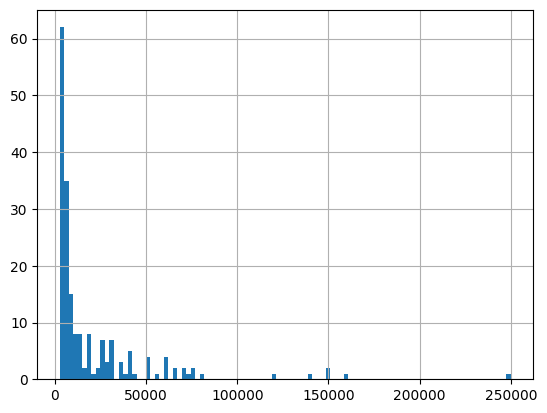

In [8]:
batter['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력합니다.

<Axes: >

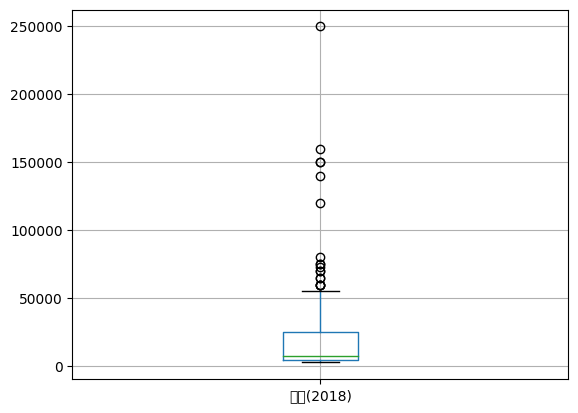

In [9]:
batter.boxplot(column=['연봉(2018)']) # 연봉의 Boxplot을 출력합니다.

-----

### [회귀 분석에 사용할 피처 살펴보기]

In [10]:
batter_features_df = batter[['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       'BABIP', '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)',
       '연봉(2017)']]

In [34]:
batter = batter.drop('BABIP', axis=1)

In [35]:
print(batter.columns)

Index(['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
       '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2018)', '연봉(2017)'],
      dtype='object')


In [11]:
print(batter_features_df)

      경기   타석   타수   안타  홈런   득점   타점  볼넷   삼진  도루  BABIP     타율    출루율  \
0    130  527  430  136  46   89  113  70  107   1  0.316  0.316  0.427   
1    142  629  514  176  26   98  120  96   82   0  0.362  0.342  0.450   
2    131  543  483  177  20   91   78  41   64  20   0.39  0.366  0.424   
3    125  561  498  173  24  103   99  48  116  17  0.413  0.347  0.415   
4    144  667  576  193  20  113   80  83   96  25  0.374  0.335  0.420   
..   ...  ...  ...  ...  ..  ...  ...  ..  ...  ..    ...    ...    ...   
186  135  391  351   78   4   39   40  26   55   3  0.252  0.222  0.284   
187   88  327  299   83   1   38   21  15   58   8   0.34  0.278  0.311   
188  114  372  333   89   2   28   35  17   66   5  0.327  0.267  0.323   
189   57  116  106   18   0   11   10   8   13   0  0.191  0.170  0.233   
190   67  145  131   29   0   23    2   5   15   4   0.25  0.221  0.255   

       장타율    OPS   wOBA   WAR  연봉(2018)  연봉(2017)  
0    0.684  1.111  0.442  7.30    120000    12

In [12]:
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

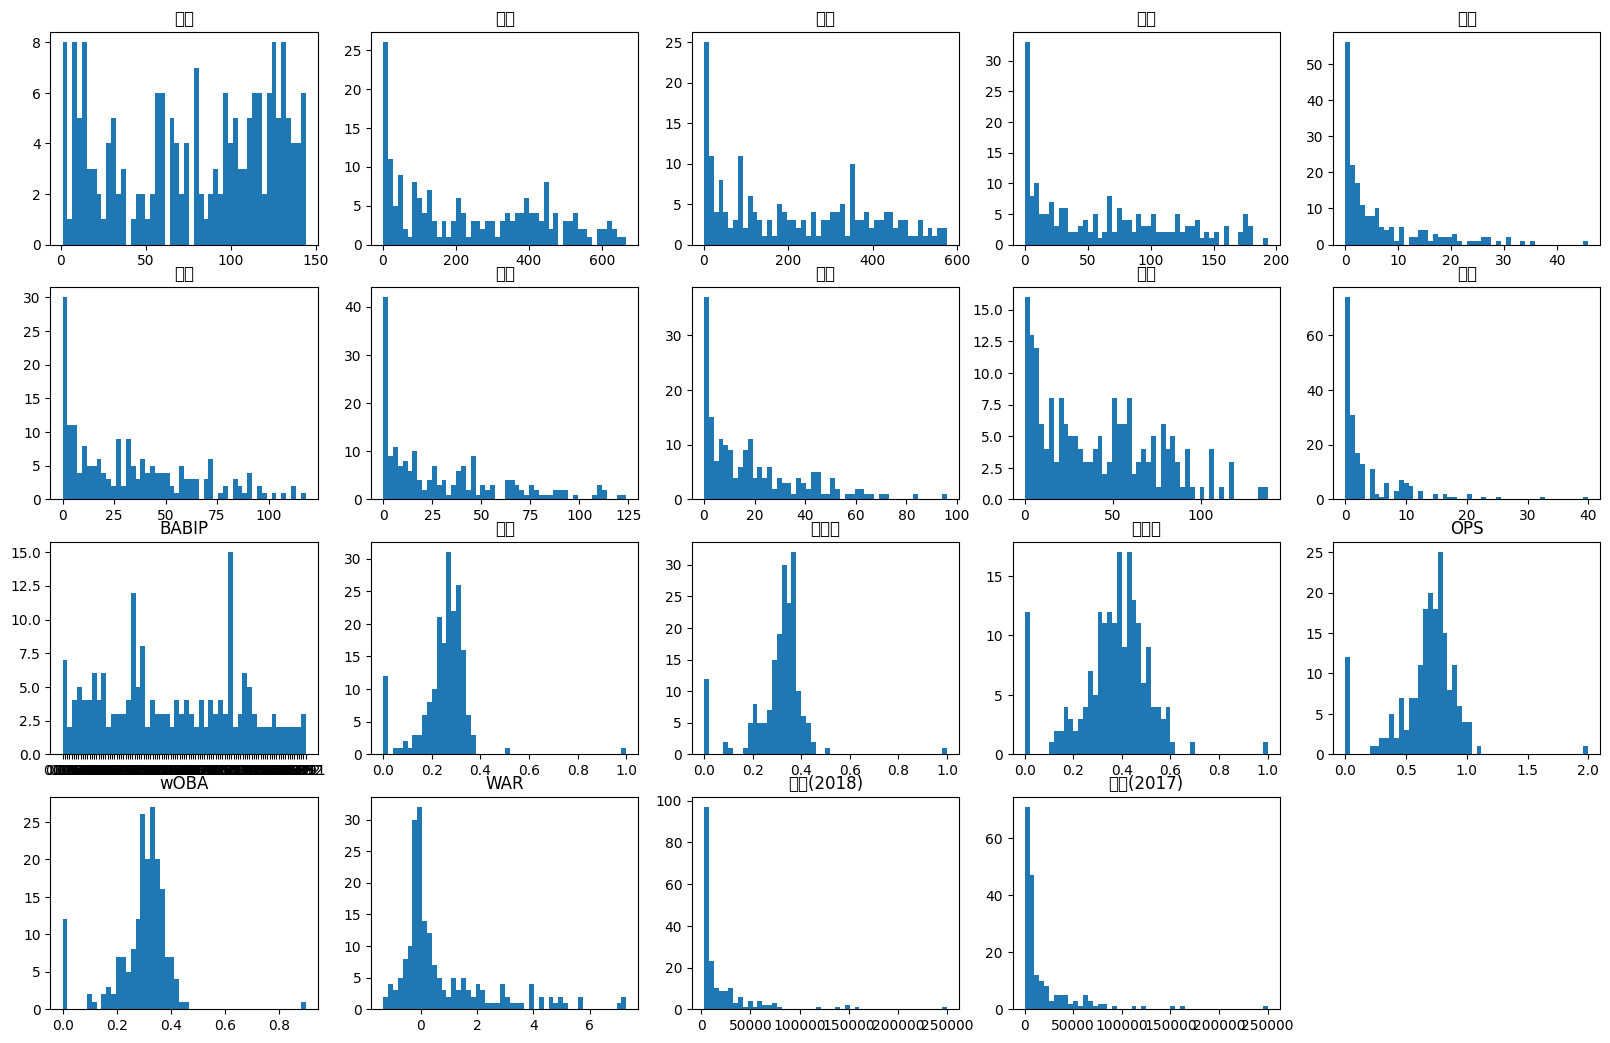

In [13]:
plot_hist_each_column(batter_features_df)

-----

# <Step2. 예측> : 타자의 연봉 예측하기

### [피처들의 단위 맞춰주기 : 피처 스케일링]

In [14]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [33]:
batter['BABIP'] = batter['BABIP'].replace('-', np.nan).astype(float)
print(batter['BABIP'])

0      0.316
1      0.362
2      0.390
3      0.413
4      0.374
       ...  
186    0.252
187    0.340
188    0.327
189    0.191
190    0.250
Name: BABIP, Length: 191, dtype: float64


In [26]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        print(col)
        print(df[col].dtype)
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [20]:
print(batter_features_df)

           경기        타석        타수        안타        홈런        득점        타점  \
0    1.149505  1.434367  1.231734  1.344928  4.621390  1.871933  2.601791   
1    1.413314  1.952604  1.716832  2.074446  2.289944  2.174277  2.823399   
2    1.171489  1.515659  1.537807  2.092684  1.590510  1.939120  1.493746   
3    1.039584  1.607113  1.624432  2.019732  2.056799  2.342246  2.158573   
4    1.457283  2.145672  2.074881  2.384491  1.590510  2.678185  1.557063   
..        ...       ...       ...       ...       ...       ...       ...   
186  1.259426  0.743385  0.775510  0.287128 -0.274647  0.192241  0.290727   
187  0.226172  0.418217  0.475211  0.378318 -0.624364  0.158647 -0.310783   
188  0.797759  0.646851  0.671561  0.487745 -0.507791 -0.177291  0.132435   
189 -0.455336 -0.653821 -0.639360 -0.807148 -0.740936 -0.748386 -0.659025   
190 -0.235495 -0.506479 -0.494985 -0.606531 -0.740936 -0.345260 -0.912292   

           볼넷        삼진        도루  BABIP     타율    출루율    장타율    OPS   wOBA

In [36]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루',
        '타율', '출루율', '장타율', 'OPS', 'wOBA', 'WAR', '연봉(2017)']
batter_df = standard_scaling(batter, scale_columns)

경기
float64
타석
float64
타수
float64
안타
float64
홈런
float64
득점
float64
타점
float64
볼넷
float64
삼진
float64
도루
float64
타율
float64
출루율
float64
장타율
float64
OPS
float64
wOBA
float64
WAR
float64
연봉(2017)
int64


In [37]:
batter_df = batter_df.rename(columns={'연봉(2018)': 'y'})
batter_df.head(5)

,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,타율,출루율,장타율,OPS,wOBA,WAR,y,연봉(2017)
0,최정,SK,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,-0.448042,0.647202,1.064628,2.156064,1.732763,1.380264,3.857382,120000,3.264136
1,최형우,KIA,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,-0.615839,0.899677,1.267954,1.424382,1.397014,1.268659,3.798140,150000,4.234754
2,박건우,두산,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,2.740086,1.132730,1.038107,1.465031,1.318014,1.212856,3.703353,37000,0.012569
3,나성범,NC,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,2.236697,0.948230,0.958544,1.478581,1.290364,1.138453,2.873969,43000,0.514054
4,손아섭,롯데,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,3.579067,0.831703,1.002746,1.004343,1.033615,0.971045,2.850272,150000,1.484672


-----

### [피처들의 단위 맞춰주기 : one-hot-encoding]

In [38]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(batter_df['팀명'])
batter_df = batter_df.drop('팀명', axis=1)
batter_df = batter_df.join(team_encoding)

In [39]:
team_encoding.head(20)

,KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0


In [40]:
batter_df.head()

,선수명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,...,KIA,KT,LG,NC,SK,넥센,두산,롯데,삼성,한화
0,최정,1.149505,1.434367,1.231734,1.344928,4.621390,1.871933,2.601791,2.595310,1.960099,...,0,0,0,0,1,0,0,0,0,0
1,최형우,1.413314,1.952604,1.716832,2.074446,2.289944,2.174277,2.823399,3.927160,1.204511,...,1,0,0,0,0,0,0,0,0,0
2,박건우,1.171489,1.515659,1.537807,2.092684,1.590510,1.939120,1.493746,1.109785,0.660487,...,0,0,0,0,0,0,1,0,0,0
3,나성범,1.039584,1.607113,1.624432,2.019732,2.056799,2.342246,2.158573,1.468360,2.232111,...,0,0,0,1,0,0,0,0,0,0
4,손아섭,1.457283,2.145672,2.074881,2.384491,1.590510,2.678185,1.557063,3.261235,1.627640,...,0,0,0,0,0,0,0,1,0,0


-----

### [회귀 분석 적용하기]

##### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [41]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
X = batter_df[batter_df.columns.difference(['선수명', 'y'])]
y = batter_df['y'] #2018년 연봉은 y로 놓음...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

##### 회귀 분석 계수 학습 & 학습된 계수 출력

In [42]:
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)  # 선(평면)을 찾음.....

In [43]:
# 학습된 계수를 출력합니다.
print(lr.coef_)

[  -106.69469575  -2489.46975948   1307.93930754  -3479.13132745
 -11708.05364503  -1185.69006667   2585.55094853  32369.77428017
    760.63602732  -2402.44414699    952.62768374    940.80503747
  -2829.72311312   7440.10073261  11452.26226284   -348.93087142
   -603.18558303   7016.78523653  27033.08939518  -5419.00327067
 -19132.11801473 -70116.51082651  58509.98223723   2291.0986013
  -2735.35573891    323.51579015   3891.17314352]


In [44]:
batter_df.columns

Index(['선수명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷', '삼진', '도루', '타율',
       '출루율', '장타율', 'OPS', 'wOBA', 'WAR', 'y', '연봉(2017)', 'KIA', 'KT', 'LG',
       'NC', 'SK', '넥센', '두산', '롯데', '삼성', '한화'],
      dtype='object')

-----

# <Step3. 평가> : 예측 모델 평가하기

### [어떤 피처가 가장 영향력이 강한 피처일까]

In [45]:
!pip install statsmodels

In [46]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     67.34
Date:                Tue, 09 May 2023   Prob (F-statistic):           5.85e-61
Time:                        11:37:21   Log-Likelihood:                -1567.4
No. Observations:                 152   AIC:                             3187.
Df Residuals:                     126   BIC:                             3265.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.917e+04    599.895     31.954      0.000     1.8e+04    2.04e+04
KIA         1810.2093   2310.363      0.784      0.435   -2761.931    6382.350
KT          -572.5657   2187.605     -0.262      0.794   -4901.772    3756.641
LG          3224.8434   2025.881      1.592      0.114    -784.316    7234.003
NC         -1562.2273   2022.430     -0.772      0.441   -5564.557    2440.102
OPS        -1.171e+04   9617.290     -1.217      0.226   -3.07e+04    7324.281
SK           731.2140   2054.913      0.356      0.723   -3335.398    4797.826
WAR         2585.5509   3253.642      0.795      0.428   -3853.311    9024.413
wOBA        3.237e+04   2.87e+04      1.128      0.262   -2.44e+04    8.92e+04
경기           760.6360   2643.092      0.288      0.774   -4469.966    5991.238
넥센          -485.5401   1922.828     -0.253      0.801   -4290.760    3319.680
도루           952.6277   1015.871      0.938      0.350   -1057.750    2963.006
두산          2857.7091   2252.777      1.269      0.207   -1600.471    7315.889
득점         -2829.7231   3415.253     -0.829      0.409   -9588.408    3928.961
롯데          9357.0048   2188.659      4.275      0.000    5025.714    1.37e+04
볼넷          1.145e+04   3569.760      3.208      0.002    4387.811    1.85e+04
삼성          1567.9732   1993.867      0.786      0.433   -2377.830    5513.776
삼진          -603.1856   2193.319     -0.275      0.784   -4943.700    3737.328
안타          7016.7852   1.12e+04      0.624      0.533   -1.52e+04    2.93e+04
연봉(2017)    2.703e+04   1240.541     21.791      0.000    2.46e+04    2.95e+04
장타율        -5419.0033   5659.542     -0.957      0.340   -1.66e+04    5781.064
출루율        -1.913e+04   1.48e+04     -1.296      0.197   -4.84e+04    1.01e+04
타석         -7.012e+04   3.74e+04     -1.873      0.063   -1.44e+05    3976.542
타수          5.851e+04   3.92e+04      1.493      0.138    -1.9e+04    1.36e+05
타율          2291.0986   2681.449      0.854      0.394   -3015.410    7597.607
타점         -2735.3557   3829.398     -0.714      0.476   -1.03e+04    4842.911
한화          2240.4198   1965.234      1.140      0.256   -1648.720    6129.560
홈런          3891.1731   3036.749      1.281      0.202   -2118.464    9900.810
==============================================================================
Omnibus:                      115.025   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3010.107
Skew:                           2.221   Prob(JB):                         0.00
Kurtosis:                      24.343   Cond. No.                     4.70e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.26e-31. This might indicate

[Text(0, 0, 'const'),
 Text(1, 0, 'KIA'),
 Text(2, 0, 'KT'),
 Text(3, 0, 'LG'),
 Text(4, 0, 'NC'),
 Text(5, 0, 'OPS'),
 Text(6, 0, 'SK'),
 Text(7, 0, 'WAR'),
 Text(8, 0, 'wOBA'),
 Text(9, 0, '경기'),
 Text(10, 0, '넥센'),
 Text(11, 0, '도루'),
 Text(12, 0, '두산'),
 Text(13, 0, '득점'),
 Text(14, 0, '롯데'),
 Text(15, 0, '볼넷'),
 Text(16, 0, '삼성'),
 Text(17, 0, '삼진'),
 Text(18, 0, '안타'),
 Text(19, 0, '연봉(2017)'),
 Text(20, 0, '장타율'),
 Text(21, 0, '출루율'),
 Text(22, 0, '타석'),
 Text(23, 0, '타수'),
 Text(24, 0, '타율'),
 Text(25, 0, '타점'),
 Text(26, 0, '한화'),
 Text(27, 0, '홈런')]

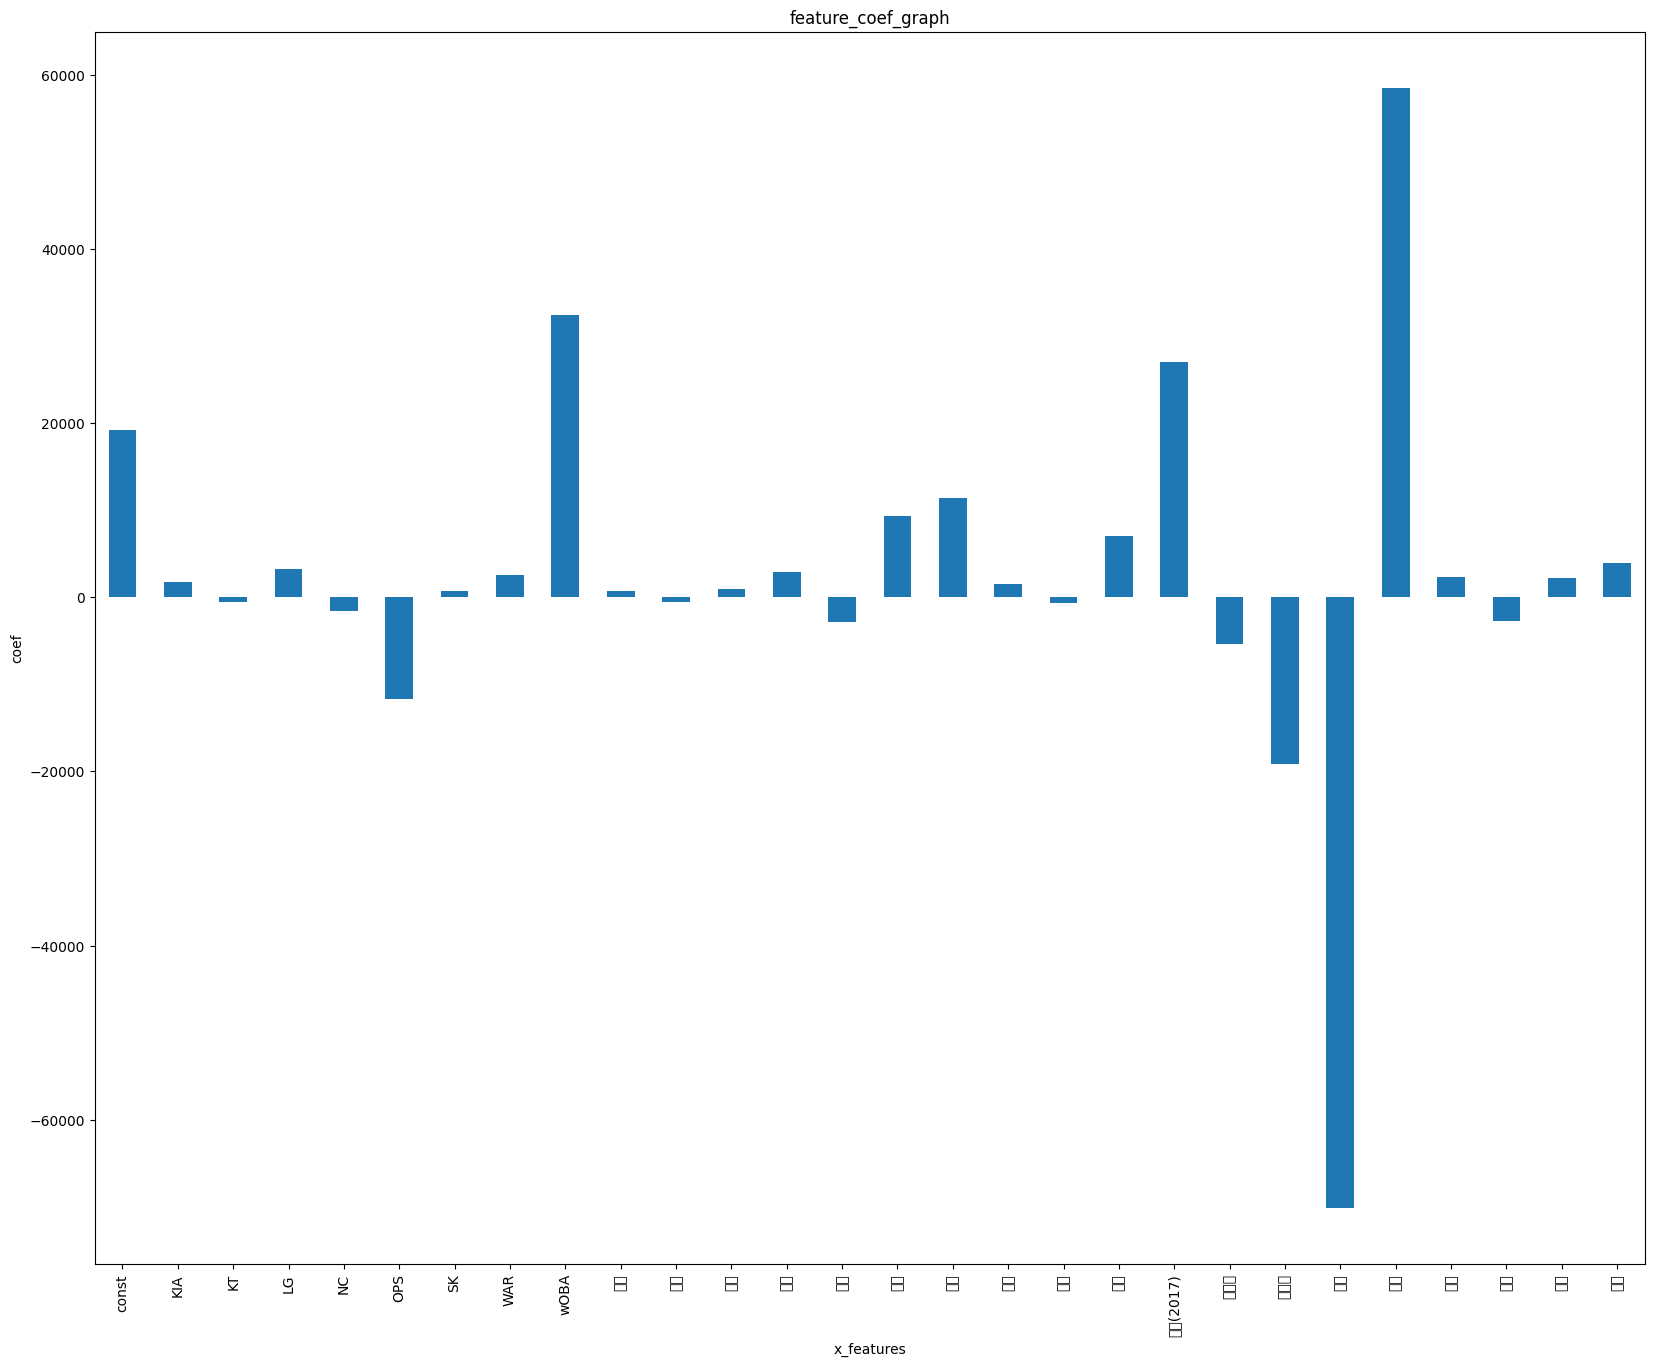

In [47]:
# 한글 출력을 위한 사전 설정 단계입니다.
#mpl.rc('font', family='AppleGothic')
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()

# 회귀 계수를 출력합니다.
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

-----

### [예측 모델의 평가]

In [49]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = batter_df[batter_df.columns.difference(['선수명', 'y'])] # 선수명과 y를 뺀 것을 모두 X로 놓는다.
y = batter_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [58]:
print(X)

     KIA  KT  LG  NC       OPS  SK       WAR      wOBA        경기  넥센  ...  \
0      0   0   0   0  1.732763   1  3.857382  1.380264  1.149505   0  ...   
1      1   0   0   0  1.397014   0  3.798140  1.268659  1.413314   0  ...   
2      0   0   0   0  1.318014   0  3.703353  1.212856  1.171489   0  ...   
3      0   0   0   1  1.290364   0  2.873969  1.138453  1.039584   0  ...   
4      0   0   0   0  1.033615   0  2.850272  0.971045  1.457283   0  ...   
..   ...  ..  ..  ..       ...  ..       ...       ...       ...  ..  ...   
186    1   0   0   0 -0.376531   0 -1.101152 -0.303117  1.259426   0  ...   
187    0   0   0   0 -0.171132   0 -1.107076 -0.098507  0.226172   0  ...   
188    0   0   1   0 -0.040782   0 -1.130773  0.041000  0.797759   0  ...   
189    1   0   0   0 -0.878180   0 -1.178166 -0.777440 -0.455336   0  ...   
190    0   0   0   0 -0.775480   0 -1.249256 -0.665834 -0.235495   0  ...   

           안타  연봉(2017)       장타율       출루율        타석        타수        타율  

In [51]:
# 이 부분추가...
y_predictions = lr.predict(X_test)
print(y_predictions)
print(list(y_test))

[ 3.70704973e+03  6.33060246e+03  7.61417807e+03  1.94034493e+04
  3.20522601e+03  2.46780858e+05  4.65136777e+03  5.58405917e+03
  6.74506561e+03 -1.30616225e+02  1.64356410e+04  3.36364676e+03
  9.90956385e+02  1.16550579e+04  7.03324845e+03  1.58995439e+03
  4.10843341e+04  4.00265644e+03 -1.33285982e+02  4.49188437e+03
  3.82436493e+03  6.38595411e+04  1.57941411e+05  5.96430344e+03
  3.67281796e+04  8.16884693e+04  9.51046856e+03  3.27866742e+03
 -4.74744747e+02  3.60044882e+04  5.25839752e+04  2.02492061e+04
  5.04661121e+03  7.21923894e+03  1.89810371e+04  2.27898852e+03
  3.05649605e+04  8.85085202e+03 -3.11374864e+02]
[7500, 8500, 7300, 25000, 3300, 250000, 3300, 7500, 6000, 4000, 18500, 3000, 3500, 2800, 7000, 2800, 29000, 3000, 3300, 3200, 6200, 40000, 150000, 3400, 30000, 40000, 13000, 5700, 7800, 32000, 60000, 15000, 4500, 5500, 30000, 3600, 32000, 7500, 3300]


In [52]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [56]:
#예측값을 예측연본(2018)에 추가
batter_df['예측연봉(2018)'] = pd.Series(y_predictions)

In [59]:
# 원래의 데이터 프레임을 다시 로드합니다.
batter = pd.read_csv(picher_file_path)
batter = batter[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
#result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df = batter_df
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,최정,120000,3707.049731,NaN
1,1,최형우,150000,6330.602460,NaN
2,2,박건우,37000,7614.178072,NaN
3,3,나성범,43000,19403.449341,NaN
4,4,손아섭,150000,3205.226012,NaN
5,5,김선빈,28000,246780.857587,NaN
6,6,버나디나,75000,4651.367769,NaN
7,7,박민우,32000,5584.059166,NaN
8,8,김하성,32000,6745.065614,NaN
9,9,스크럭스,70000,-130.616225,NaN


##### R2 score

In [23]:
# 회귀 분석 모델을 평가합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9276949405576705
0.8860171644977815


##### RMSE score

In [24]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7282.718684746374
14310.69643688915


### [적절한 피처로 다시 학습하기]

In [31]:
# 피처를 재선정합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [32]:
print(X)

          FIP       WAR      볼넷/9      삼진/9  연봉(2017)
0   -0.971030  4.503142 -0.869000  0.672099  2.734705
1   -1.061888  4.094734 -0.987502  0.134531  1.337303
2   -0.837415  3.761956 -0.885929  0.109775  5.329881
3   -0.698455  2.998081 -0.945180  0.350266  3.333592
4   -0.612941  2.809003 -0.877464  0.155751  2.734705
..        ...       ...       ...       ...       ...
147  0.375810 -0.859111 -0.373829 -0.968896 -0.335587
148  0.482702 -0.874237  0.603817 -0.777918 -0.535215
149  1.348527 -0.964995  0.307561 -0.756699 -0.020173
150  0.728554 -1.033063  1.196330  0.205264 -0.543201
151  1.118709 -1.267520  0.722320 -0.449012 -0.539208

[152 rows x 5 columns]


In [33]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [34]:
y_predictions = lr.predict(X)

In [35]:
picher_df['예측연봉(2018)'] = pd.Series(y_predictions)

In [36]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


<Axes: xlabel='선수명'>

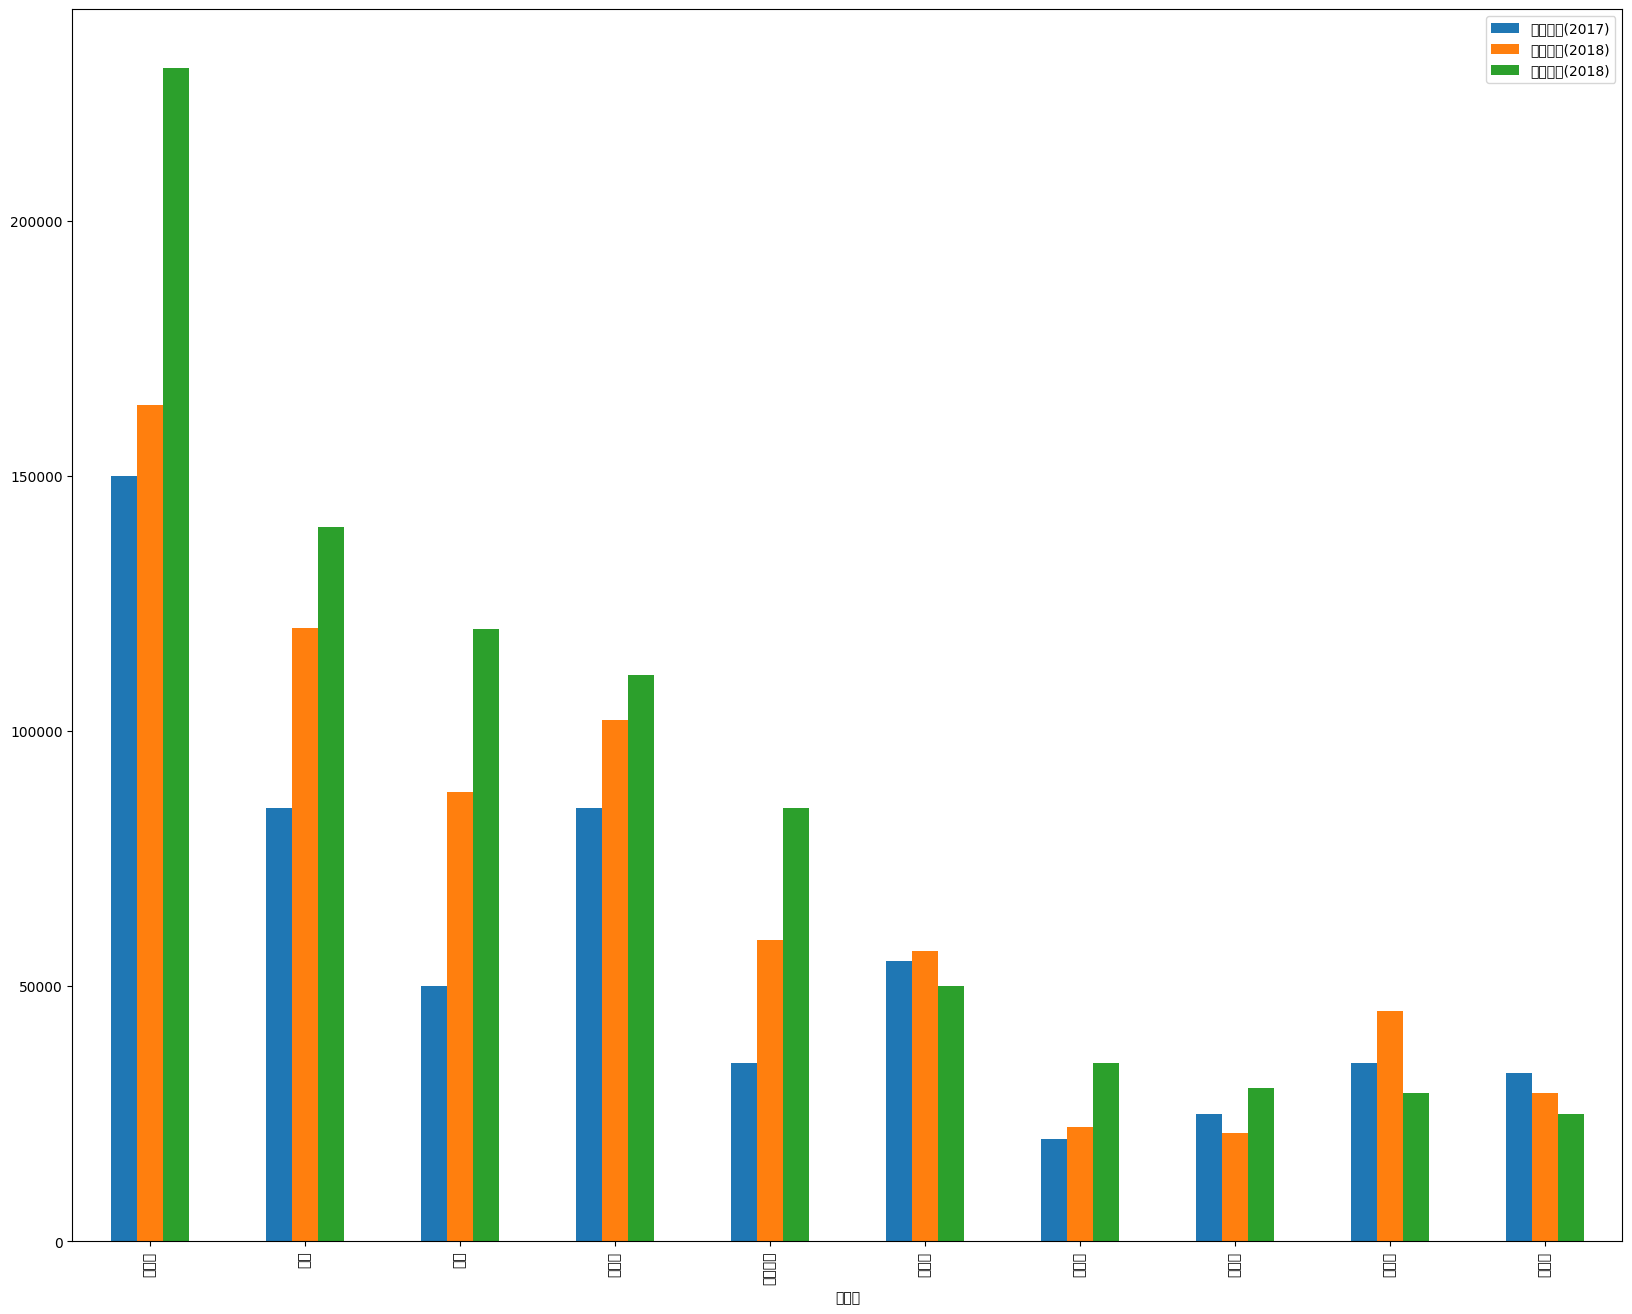

In [37]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
#mpl.rc('font', family='NanumGothicOTF')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")

-----

### `[미니 퀴즈 - 3.1]`
- `Train score, 그리고 Test score의 차이점은 무엇일까요? 그리고 어떤 점수가 더 높아야 할까요?` 
    - 훈련 데이터셋을 통해 계산한 점수와 테스트 데이터셋을 통해 계산한 점수간에는 어떤 차이가 있는 것인지 적어 봅시다. 그리고 이 두 점수의 차이가 크다면, 어떤 상황을 의미하는 것인지 생각해 봅시다.
        - `대답 예시` : 훈련 데이터셋은 오로지 모델을 학습하고, 비용함수(오차함수)를 평가하는데 사용됩니다. 반면, 테스트 데이터셋은 모델에 영향을 미치지 않습니다. 결과를 예측하기 위한 입력데이터로만 활용됩니다. 가장 이상적인 경우는 Train score, Test score가 차이가 없는 것입니다. 이 차이가 벌어질수록 모델이 훈련 데이터셋에 과적합된 것입니다. 일반적으로는 Train score가 약간 더 높습니다.

-----

-----

-----